In [12]:
import numpy as np

def t_min_max_cover(weights):
    # Create weighted adjacency matrix
    n = len(weights)
    adj_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                adj_matrix[i][j] = weights[i] + weights[j]
    
    # Initialize partitions and weights
    A = {0}
    B = set(range(1, n))
    total_weight = sum(weights)
    target_weight = total_weight / 2
    
    # Iteratively add nodes to partitions
    while sum([weights[i] for i in A]) < target_weight:
        # Find nodes adjacent to partition A and not in partition B
        candidates = [j for j in B if adj_matrix[list(A), j].sum() > 0]
        # Choose node with highest weight and add to partition A
        node = max(candidates, key=lambda x: weights[x])
        A.add(node)
        B.remove(node)
        
    while sum([weights[i] for i in B]) < target_weight:
        # Find nodes adjacent to partition B and not in partition A
        candidates = [j for j in A if adj_matrix[list(B), j].sum() > 0]
        # Choose node with highest weight and add to partition B
        node = max(candidates, key=lambda x: weights[x])
        B.add(node)
        A.remove(node)
        
    return A, B


In [13]:
A, B = t_min_max_cover([1, 3, 1, 2, 2])

In [14]:
print(A)
print(B)

{0, 3}
{1, 2, 4}


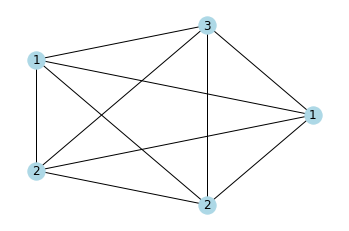

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Define graph
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4])
G.add_weighted_edges_from([(0, 1, 1), (0, 2, 1), (0, 3, 2), (0, 4, 2), (1, 2, 4), (1, 3, 5), (1, 4, 5), (2, 3, 3), (2, 4, 3), (3, 4, 4)])

# Draw graph
pos = nx.circular_layout(G)
labels = {i: w for i, w in enumerate([1, 3, 1, 2, 2])}
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_labels(G, pos, labels)
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()


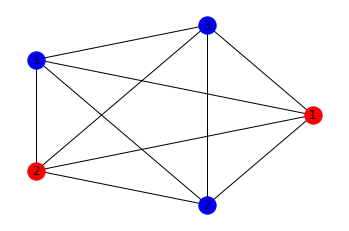

In [16]:
# Get partitioned nodes
A, B = t_min_max_cover([1, 3, 1, 2, 2])

# Create subgraphs for each partition
subgraph_A = G.subgraph(A)
subgraph_B = G.subgraph(B)

# Draw subgraphs with different colors
pos = nx.circular_layout(G)
labels = {i: w for i, w in enumerate([1, 3, 1, 2, 2])}
nx.draw_networkx_nodes(subgraph_A, pos, node_color='red')
nx.draw_networkx_nodes(subgraph_B, pos, node_color='blue')
nx.draw_networkx_labels(G, pos, labels)
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()


In [17]:
import math

def t_min_max_cover(weights):
    n = len(weights)
    t = math.log(n)
    
    # Construct bipartite graph
    A = set()
    B = set()
    for i, w in enumerate(weights):
        if sum(A) < sum(B) or (sum(A) == sum(B) and len(A) <= len(B)):
            A.add(w)
        else:
            B.add(w)
    
    # Swap nodes between partitions to minimize weight
    while True:
        a_min = min(A)
        b_max = max(B)
        if b_max - a_min <= t:
            break
        A.remove(a_min)
        B.remove(b_max)
        A.add(b_max)
        B.add(a_min)
    
    return A, B


In [18]:
weights = [1, 3, 1, 2, 2]
partition1, partition2 = t_min_max_cover(weights)
print(partition1, partition2)


{2, 3} {1, 2}


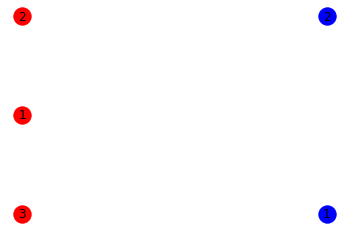

In [20]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def t_min_max_cover(weights):
    n = len(weights)
    t = math.log(n)
    
    # Construct bipartite graph
    G = nx.Graph()
    partition_A = set()
    partition_B = set()
    for i, w in enumerate(weights):
        if sum(partition_A) < sum(partition_B) or (sum(partition_A) == sum(partition_B) and len(partition_A) <= len(partition_B)):
            G.add_node(i, bipartite=0, weight=w)
            partition_A.add(i)
        else:
            G.add_node(i, bipartite=1, weight=w)
            partition_B.add(i)
    
    # Add edges between partitions
    for node in G.nodes():
        if G.nodes[node]['bipartite'] == 0:
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]['bipartite'] == 1:
                    G.add_edge(node, neighbor)
    
    # Swap nodes between partitions to minimize weight
    while True:
        a_min = min(partition_A, key=lambda x: G.nodes[x]['weight'])
        b_max = max(partition_B, key=lambda x: G.nodes[x]['weight'])
        if G.nodes[b_max]['weight'] - G.nodes[a_min]['weight'] <= t:
            break
        partition_A.remove(a_min)
        partition_B.remove(b_max)
        partition_A.add(b_max)
        partition_B.add(a_min)
    
    return G, partition_A, partition_B

# Example usage
weights = [1, 3, 1, 2, 2]
G, partition1, partition2 = t_min_max_cover(weights)

# Draw graph with partitions
pos = nx.bipartite_layout(G, partition1)
subgraph1 = G.subgraph(partition1)
subgraph2 = G.subgraph(partition2)
nx.draw_networkx_nodes(subgraph1, pos, node_color='r')
nx.draw_networkx_nodes(subgraph2, pos, node_color='b')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1)
nx.draw_networkx_labels(G, pos, labels={node: G.nodes[node]['weight'] for node in G.nodes()})
plt.axis('off')
plt.show()


In [21]:
import numpy as np

# Define the graph as an adjacency matrix
adj_matrix = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
])

# Define the node weights
node_weights = [1, 3, 1, 2, 2]

# Sort the nodes in descending order of their weights
sorted_nodes = sorted(range(len(node_weights)), key=lambda i: node_weights[i], reverse=True)

# Initialize sets A and B
set_a = set([sorted_nodes[0]])
set_b = set(sorted_nodes[1:])

# Iterate over the remaining nodes and assign them to set A or set B
for node in sorted_nodes[1:]:
    # Calculate the weight difference if we add the node to set A or set B
    weight_diff_a = abs(sum([node_weights[i] for i in set_a]) + node_weights[node] - sum([node_weights[i] for i in set_b]))
    weight_diff_b = abs(sum([node_weights[i] for i in set_b]) + node_weights[node] - sum([node_weights[i] for i in set_a]))
    
    # Assign the node to the set that results in the minimum weight difference
    if weight_diff_a <= weight_diff_b:
        set_a.add(node)
    else:
        set_b.add(node)

# Build the subgraphs
subgraph_1 = adj_matrix[np.ix_(list(set_a), list(set_a))]
subgraph_2 = adj_matrix[np.ix_(list(set_b), list(set_b))]

print("Subgraph 1:")
print("Nodes:", set_a)
print("Edges:\n", subgraph_1)

print("\nSubgraph 2:")
print("Nodes:", set_b)
print("Edges:\n", subgraph_2)


Subgraph 1:
Nodes: {1, 3, 4}
Edges:
 [[0 0 0]
 [0 0 0]
 [0 0 0]]

Subgraph 2:
Nodes: {0, 2, 3, 4}
Edges:
 [[0 1 0 0]
 [1 0 1 1]
 [0 1 0 0]
 [0 1 0 0]]


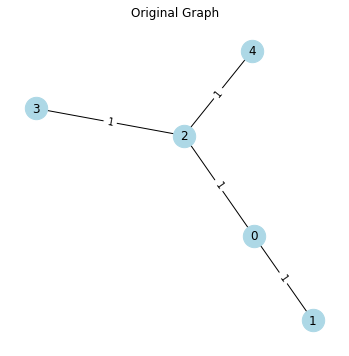

TypeError: 'module' object is not callable

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the graph as an adjacency matrix
adj_matrix = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
])

# Define the node weights
node_weights = [1, 3, 1, 2, 2]

# Define the graph using NetworkX
G = nx.convert_matrix.from_numpy_array(adj_matrix)

# Set the node weights as node attributes
node_weights_dict = {i: {'weight': node_weights[i]} for i in range(len(node_weights))}
nx.set_node_attributes(G, node_weights_dict)

# Draw the original graph
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=10)
plt.axis('off')
plt.title("Original Graph")
plt.show()

# Sort the nodes in descending order of their weights
sorted_nodes = sorted(range(len(node_weights)), key=lambda i: node_weights[i], reverse=True)

# Initialize sets A and B
set_a = set([sorted_nodes[0]])
set_b = set()

# Iterate over the remaining nodes and assign them to set A or set B
for node in sorted_nodes[1:]:
    # Calculate the weight difference if we add the node to set A or set B
    weight_diff_a = abs(sum([node_weights[i] for i in set_a]) + node_weights[node] - sum([node_weights[i] for i in set_b]))
    weight_diff_b = abs(sum([node_weights[i] for i in set_b]) + node_weights[node] - sum([node_weights[i] for i in set_a]))
    
    # Assign the node to the set that results in the minimum weight difference
    
    if weight_diff_a <= weight_diff_b:
        temp_graph = nx.graph(set_a.add(node))
        if temp_graph.is_connected():    
            set_a.add(node)
    else:
        set_b.add(node)

# Build the subgraphs
subgraph_1 = G.subgraph(set_a)
subgraph_2 = G.subgraph(set_b)

# Draw the subgraphs
plt.figure(figsize=(12,6))

# Draw subgraph 1
plt.subplot(1, 2, 1)
pos = nx.spring_layout(subgraph_1)
nx.draw_networkx_nodes(subgraph_1, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(subgraph_1, pos, width=1)
nx.draw_networkx_labels(subgraph_1, pos)
plt.axis('off')
plt.title("Subgraph 1 (Nodes 2 and 3)")

# Draw subgraph 2
plt.subplot(1, 2, 2)
pos = nx.spring_layout(subgraph_2)
nx.draw_networkx_nodes(subgraph_2, pos, node_size=500, node_color='red')
nx.draw_networkx_edges(subgraph_2, pos, width=1)
nx.draw_networkx_labels(subgraph_2, pos)
plt.axis('off')
plt.title("Subgraph 2 (Nodes 1,4 and 5)")
